# **ML LAB 7: 19 Feb, 2025**

## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**

In [1]:
import numpy as np
import pandas as pd

## **Q1**

In [2]:
df = pd.read_csv('liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.drop(['Gender'], axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
scaler = MinMaxScaler()

In [6]:
X = df.drop(['liver_disease'], axis=1)
y = df['liver_disease']

In [7]:
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size = 0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

e:\VIT Study Materials\SEM 2\Data Mining and ML\LAB\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = LR.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.7435897435897436


## **Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [13]:
DT.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
y_pred = DT.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.717948717948718


## **Bagging Classifier**

In [15]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
BC = BaggingClassifier(n_estimators = 100, random_state = 0)
BC.fit(X_train,y_train)
print(accuracy_score(BC.predict(X_test),y_test))

e:\VIT Study Materials\SEM 2\Data Mining and ML\LAB\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:877: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7264957264957265


## **Random Forest Classifier**

In [16]:
RF = RandomForestClassifier(n_estimators = 100, max_features = "sqrt",random_state = 0)
RF.fit(X_train,y_train)
print(accuracy_score(RF.predict(X_test),y_test))

0.7350427350427351


e:\VIT Study Materials\SEM 2\Data Mining and ML\LAB\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## **Q2**

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [21]:
X, y = make_classification(n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y

array([0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## **Decision Tree**

In [23]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.95


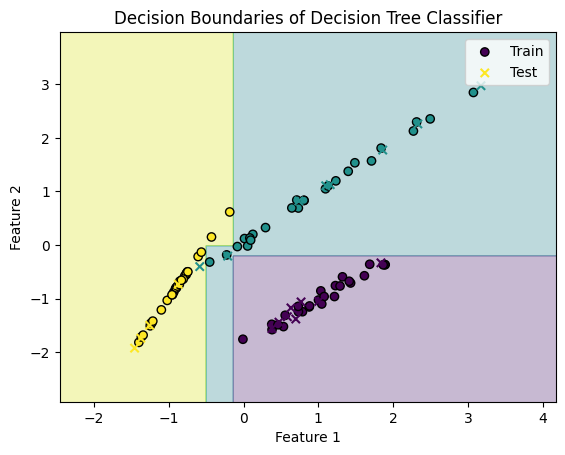

In [24]:

x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of Decision Tree Classifier")
plt.legend()
plt.show()


## **Bagging**

In [26]:
BC = BaggingClassifier(n_estimators = 100, random_state = 0)
BC.fit(X_train,y_train)
print(accuracy_score(BC.predict(X_test),y_test))

0.95


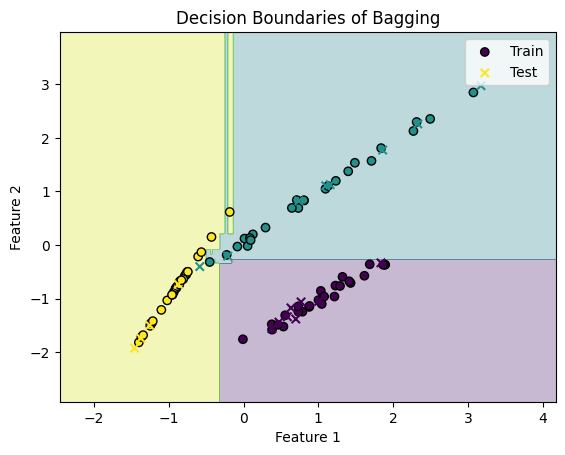

In [28]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = BC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of Bagging")
plt.legend()
plt.show()

## **RandomForest**

In [30]:
RF = RandomForestClassifier(n_estimators = 100, max_features = "sqrt",random_state = 0)
RF.fit(X_train,y_train)
print(accuracy_score(RF.predict(X_test),y_test))

0.95


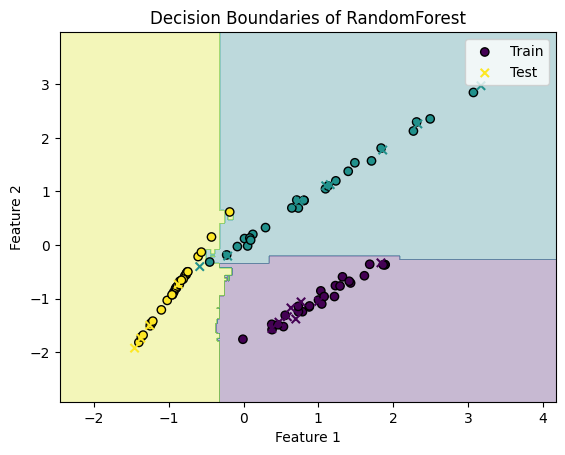

In [31]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = RF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of RandomForest")
plt.legend()
plt.show()

## **Voting Classifier**

In [32]:
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(random_state = 0)
sm_clf = model = LogisticRegression(multi_class='multinomial')
voting_clf = VotingClassifier( estimators=[('lr', log_clf), ('rf', rnd_clf), ('sm', sm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)


e:\VIT Study Materials\SEM 2\Data Mining and ML\LAB\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('sm',
                              LogisticRegression(multi_class='multinomial'))],
                 voting='soft')

In [33]:
print(accuracy_score(y_test, voting_clf.predict(X_test)))

0.95


## **Boosting**

In [35]:
from sklearn.ensemble import AdaBoostClassifier

base_model = DecisionTreeClassifier(max_depth=1)
ABC = AdaBoostClassifier(base_model, n_estimators = 500, random_state = 0)
ABC.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=500, random_state=0)

In [36]:
pred_ABC = ABC.predict(X_test)
print("AdaBoost Accuracy: ", accuracy_score(y_test, pred_ABC))

AdaBoost Accuracy:  0.9


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500, 700],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

In [38]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())


print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters for Random Forest: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 500}
Best Accuracy: 0.95


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

df_reg = pd.read_csv('Book1.csv')

df_reg = df_reg.drop(['furnishingstatus'], axis = 1)

X_reg = df_reg.iloc[:, :-1]
y_reg = df_reg.iloc[:, -1]

In [48]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Bagging Regressor": BaggingRegressor(n_estimators=100, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"{name} MSE: {mse}")

Linear Regression MSE: 0.5411497791403432
Decision Tree Regressor MSE: 1.44
Bagging Regressor MSE: 0.73795
Random Forest Regressor MSE: 0.7314779999999999
AdaBoost Regressor MSE: 0.6486355266811188
